In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/countries-of-the-world/countries of the world.csv


# Question From The Following DataSet:

1. Factors affecting GDP of a country. (Main Focus).

In [65]:
data = pd.read_csv("/kaggle/input/countries-of-the-world/countries of the world.csv")

In [66]:
data.shape

(227, 20)

In [67]:
data.head(20)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1","220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9","0,00","-6,47","23,28",3500.0,"98,6","195,7","17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418"


In [68]:
data.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

# Categorical Columns:

* Region
* Climate

# Numerical Columns:

* Population
* Area (sq. mi.)
* Pop. Density (per sq. mi.)
* Coastline (coast/area ratio)
* Net migration
* Infant mortality (per 1000 births)
* GDP ($ per capita)
* Literacy (%)
* Phones (per 1000)
* Arable (%)
* Crops (%)
* Other (%)
* Birthrate
* Deathrate
* Agriculture
* Industry
* Service
       
# Mixed Columns:

* Country

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

## Performing Data Wrangling:

* Correcting datatypes of columns.
* Most columns have , instead of .

In [70]:
data["Region"] = data["Region"].astype("category")
data["Area (sq. mi.)"] = data["Area (sq. mi.)"].astype("float")

In [71]:
def convertNum(listold):
    newlist = []
    for i in listold:
        if(str(i).lower != "nan"):
            newlist.append(float(str(i).replace(',', '.')))
        else:
            newlist.append(np.nan)
    return newlist

In [72]:
data["Coastline (coast/area ratio)"] = convertNum(data["Coastline (coast/area ratio)"])
data["Pop. Density (per sq. mi.)"] = convertNum(data["Pop. Density (per sq. mi.)"])
data["Infant mortality (per 1000 births)"] = convertNum(data["Infant mortality (per 1000 births)"])
data["Net migration"] = convertNum(data["Net migration"])
data["Literacy (%)"] = convertNum(data["Literacy (%)"])
data["Arable (%)"] = convertNum(data["Arable (%)"])
data["Crops (%)"] = convertNum(data["Crops (%)"])
data["Other (%)"] = convertNum(data["Other (%)"])
data["Birthrate"] = convertNum(data["Birthrate"])
data["Deathrate"] = convertNum(data["Deathrate"])
data["Agriculture"] = convertNum(data["Agriculture"])
data["Industry"] = convertNum(data["Industry"])
data["Service"] = convertNum(data["Service"])
data["Phones (per 1000)"] = convertNum(data["Phones (per 1000)"])
data["Climate"] = convertNum(data["Climate"])

In [73]:
data["Climate"] = data["Climate"].astype("category")

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null category
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null float64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         224 non-null float64
Infant mortality (per 1000 births)    224 non-null float64
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null float64
Phones (per 1000)                     223 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Climate                               205 non-null category
Birthrate  

In [75]:
data.head(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199.0,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468.0,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700.0,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
6,Anguilla,LATIN AMER. & CARIB,13477,102.0,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443.0,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
8,Argentina,LATIN AMER. & CARIB,39921833,2766890.0,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
9,Armenia,C.W. OF IND. STATES,2976372,29800.0,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418


## Dealing With Missing Data:

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null category
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null float64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         224 non-null float64
Infant mortality (per 1000 births)    224 non-null float64
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null float64
Phones (per 1000)                     223 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Climate                               205 non-null category
Birthrate  

In [77]:
# Every column after netmigration contains missing values, filling them up with mean values for numerical data and most occurence for categorical data.

In [78]:
data["Net migration"].fillna(data["Net migration"].mean(), inplace=True)
data["Infant mortality (per 1000 births)"].fillna(data["Infant mortality (per 1000 births)"].mean(), inplace=True)
data["GDP ($ per capita)"].fillna(data["GDP ($ per capita)"].mean(), inplace=True)
data["Literacy (%)"].fillna(data["Literacy (%)"].mean(), inplace=True)
data["Phones (per 1000)"].fillna(data["Phones (per 1000)"].mean(), inplace=True)
data["Arable (%)"].fillna(data["Arable (%)"].mean(), inplace=True)
data["Crops (%)"].fillna(data["Crops (%)"].mean(), inplace=True)
data["Other (%)"].fillna(data["Other (%)"].mean(), inplace=True)
data["Birthrate"].fillna(data["Birthrate"].mean(), inplace=True)
data["Deathrate"].fillna(data["Deathrate"].mean(), inplace=True)
data["Agriculture"].fillna(data["Agriculture"].mean(), inplace=True)
data["Industry"].fillna(data["Industry"].mean(), inplace=True)
data["Service"].fillna(data["Service"].mean(), inplace=True)

In [79]:
data["Climate"].value_counts()
data["Climate"].fillna(2.0, inplace=True)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null category
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null float64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         227 non-null float64
Infant mortality (per 1000 births)    227 non-null float64
GDP ($ per capita)                    227 non-null float64
Literacy (%)                          227 non-null float64
Phones (per 1000)                     227 non-null float64
Arable (%)                            227 non-null float64
Crops (%)                             227 non-null float64
Other (%)                             227 non-null float64
Climate                               227 non-null category
Birthrate  

In [81]:
data.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.856710,35.154225,10026.881258,18.920483,225.965194,12.982573,8.324390,16.069256,11.102286,4.945670,0.141843,0.133288,0.160243
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.905000,8.215000,1900.000000,76.400000,38.500000,3.380000,0.190000,71.985000,12.725000,5.975000,0.040000,0.200000,0.443500
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.050000,5600.000000,90.300000,181.600000,10.530000,1.080000,85.380000,18.900000,8.170000,0.116000,0.282000,0.565283
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.980000,55.335000,15700.000000,97.800000,382.900000,20.000000,4.557111,95.230000,29.770000,10.580000,0.211000,0.335000,0.671500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,50.730000,29.740000,0.769000,0.906000,0.954000


## Univariate Analysis

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
total = data.shape[0]

Population
Skew = 9.200223032094938
Kurtosis = 91.8056819897219


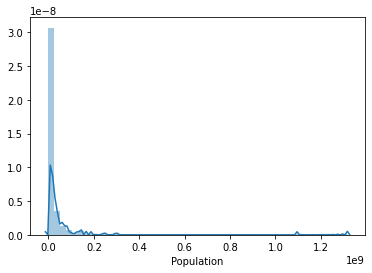

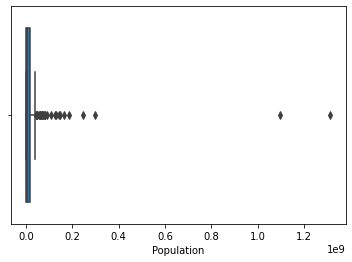

Area (sq. mi.)
Skew = 5.964245000049949
Kurtosis = 41.76486358893893


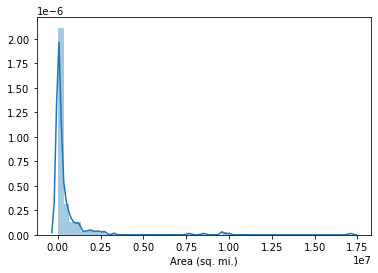

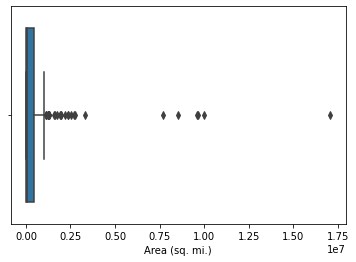

Pop. Density (per sq. mi.)
Skew = 8.284885540855095
Kurtosis = 74.22464222216051


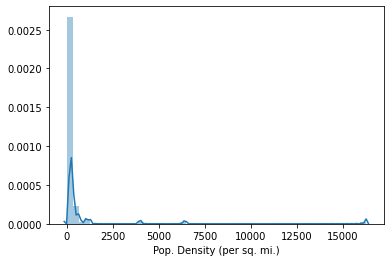

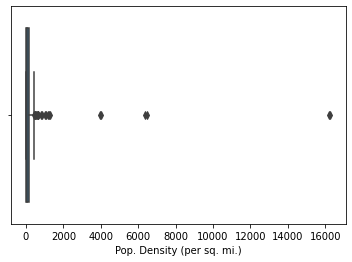

Coastline (coast/area ratio)
Skew = 8.221680027174678
Kurtosis = 87.1358888183244


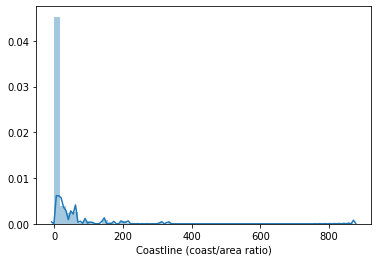

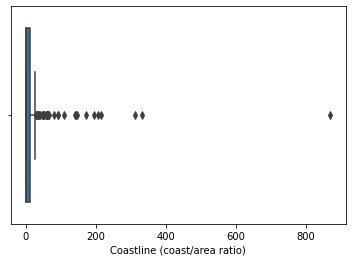

Net migration
Skew = 0.12824081799668421
Kurtosis = 6.517281059359835


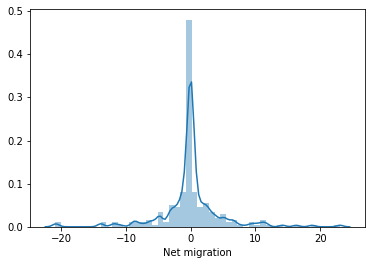

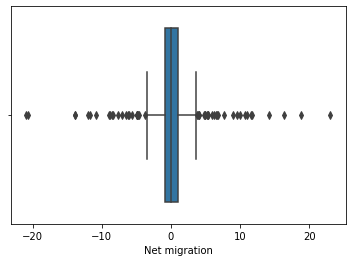

Infant mortality (per 1000 births)
Skew = 1.4393580098880385
Kurtosis = 1.9344603378713439


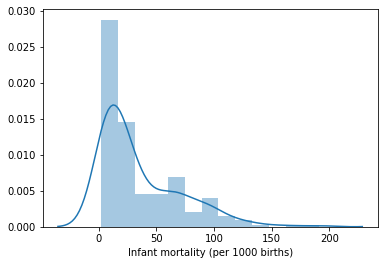

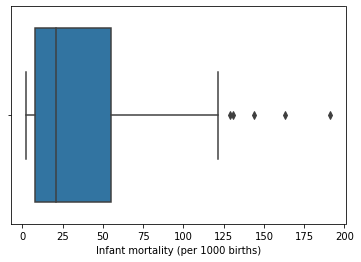

GDP ($ per capita)
Skew = 1.3789238936552997
Kurtosis = 1.5735847846602518


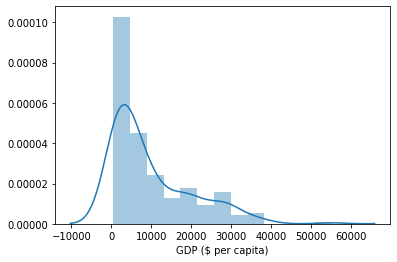

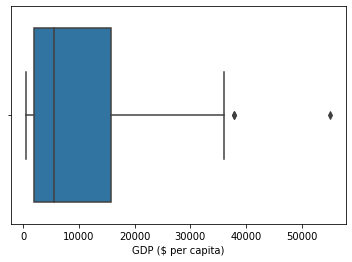

Literacy (%)
Skew = -1.2684389272941412
Kurtosis = 0.6467905585147915


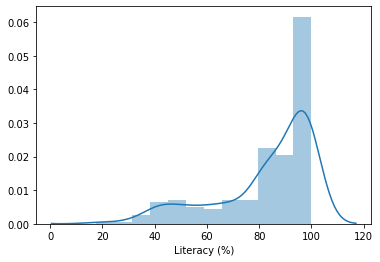

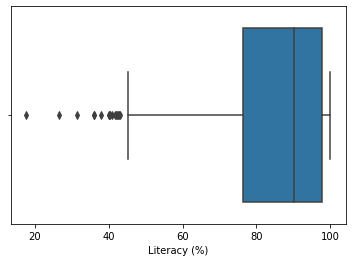

Phones (per 1000)
Skew = 1.0250200303208958
Kurtosis = 0.4788031884164381


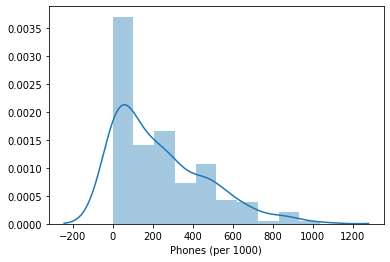

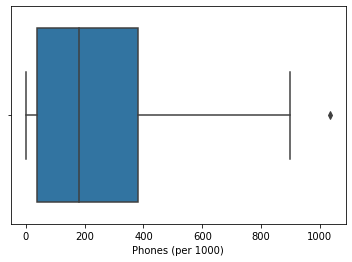

Arable (%)
Skew = 1.3405586081433694
Kurtosis = 1.655529292664669


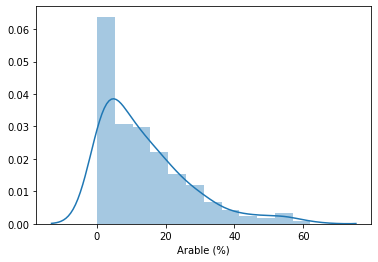

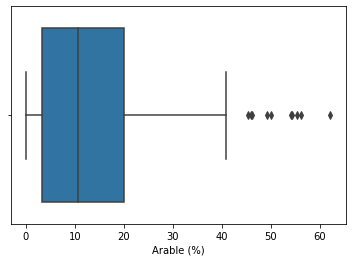

Crops (%)
Skew = 3.2393346190700254
Kurtosis = 12.318303680778188


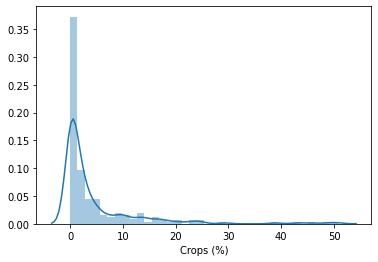

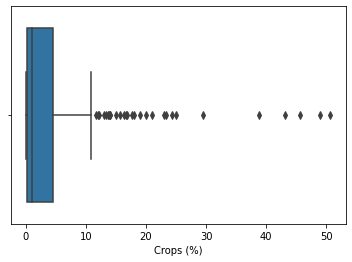

Other (%)
Skew = -0.9605254003934527
Kurtosis = 0.24463372038944176


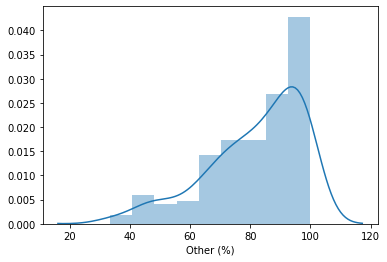

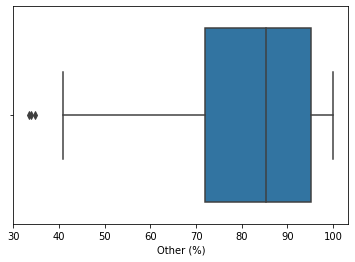

Climate
2.0    58.590308
3.0    21.145374
1.0    12.775330
1.5     3.524229
4.0     2.643172
2.5     1.321586
Name: Climate, dtype: float64


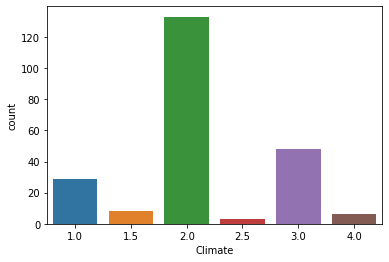

Birthrate
Skew = 0.7126223047922147
Kurtosis = -0.5782942180308979


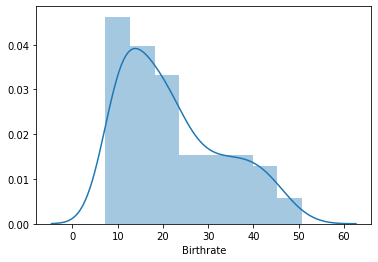

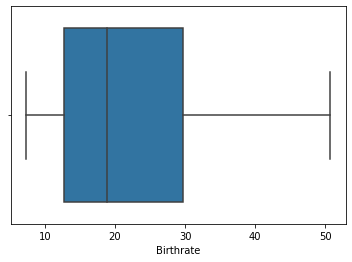

Deathrate
Skew = 1.66709708576758
Kurtosis = 3.296606707694914


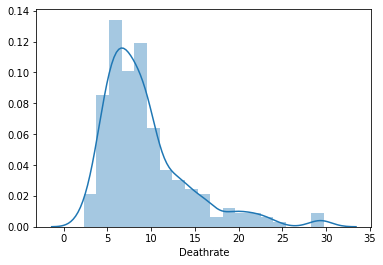

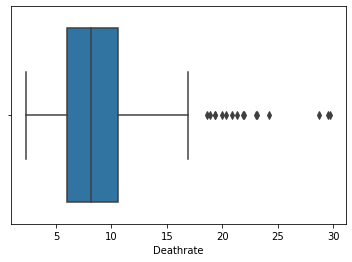

Agriculture
Skew = 1.467287081521682
Kurtosis = 2.2275265993512203


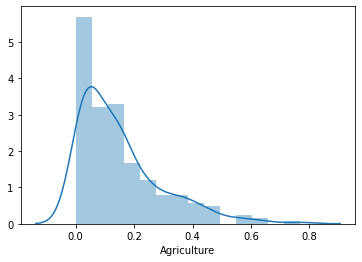

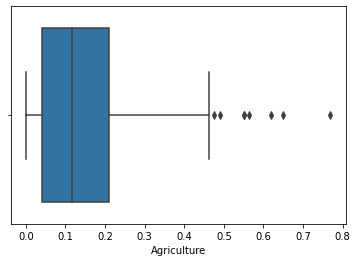

Industry
Skew = 1.1399586345670194
Kurtosis = 2.7380159507965276


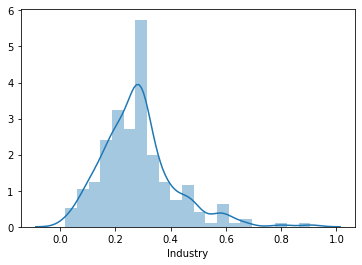

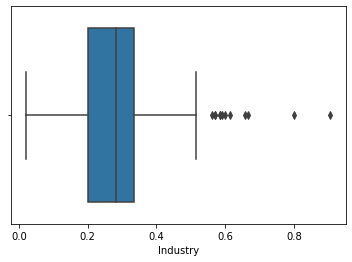

Service
Skew = -0.14163379181404717
Kurtosis = 0.013260181228101242


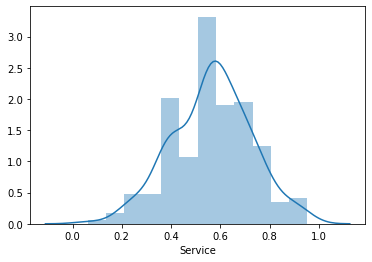

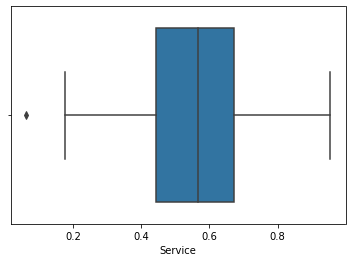

In [84]:
columnsToBeAnalyzed = data.columns[2:]
for i in columnsToBeAnalyzed:
    print(i)
    if(data[i].dtype.name == "category"):
        print((data[i].value_counts()/total)*100)
        sns.countplot(data[i])
    else:
        print("Skew =", data[i].skew())
        print("Kurtosis =", data[i].kurt())
        try:
            sns.distplot(data[i])
            
        except:
            sns.distplot(data[i], kde=False)
        
        plt.show()
        sns.boxplot(data[i])
    plt.show()

### Conclusion:

#### Population:
1. High Skewness Observed.
2. Population is low for majority of countries, few outliers like India and China.

#### Area (sq. mi.):
1. Not normal distribution, have outliers.
2. Apply feature engineering on Population and Area (sq. mi.) for better analysis.

#### Pop. Density (per sq. mi.):
1. Preffered more than Population and Area column.
2. Can consider anything above 4000 as outlier.

#### Coastline (coast/area ratio):
1. High rate of skewness and peakness.
2. Contains outliers.

#### Netmigration:
1. Shows normal distribution, good for analysis.
2. Contains a lot of outliers.

#### Infant mortality (per 1000 births):
1. Right skewed data.
2. Low number of outliers.

#### Every column contains some outliers, better to see how these vary with GDP.

## Multivariate Analysis:

Climate


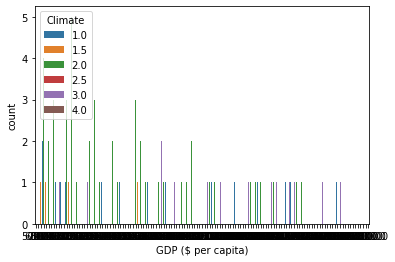

In [85]:
for i in columnsToBeAnalyzed:
    if(data[i].dtype.name == "category"):
        print(i)
        sns.countplot(data['GDP ($ per capita)'], hue=data[i])

        pd.crosstab(data[i], data['GDP ($ per capita)']).apply(lambda r: round((r/r.sum())*100,1), axis=1)
    plt.show()

Population


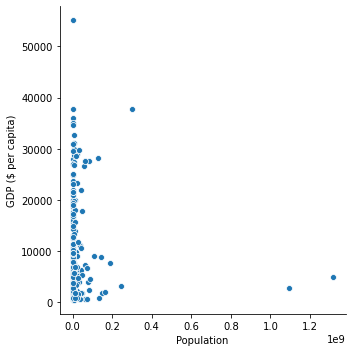

Area (sq. mi.)


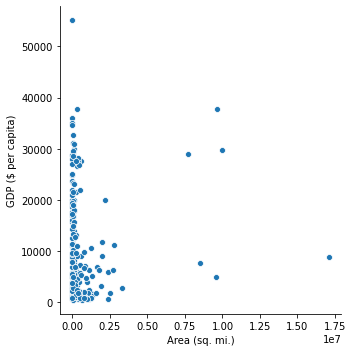

Pop. Density (per sq. mi.)


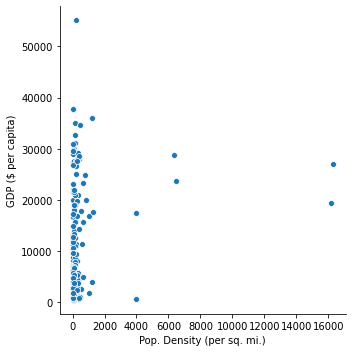

Coastline (coast/area ratio)


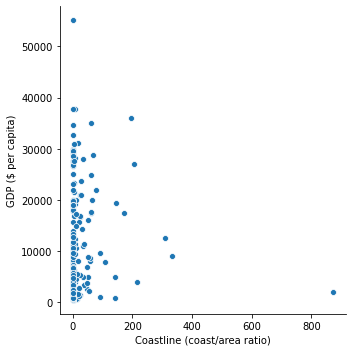

Net migration


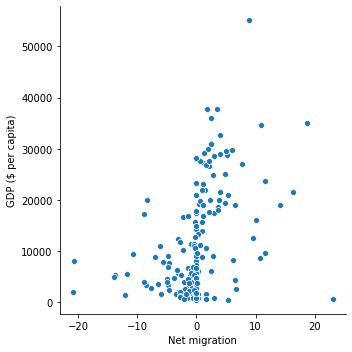

Infant mortality (per 1000 births)


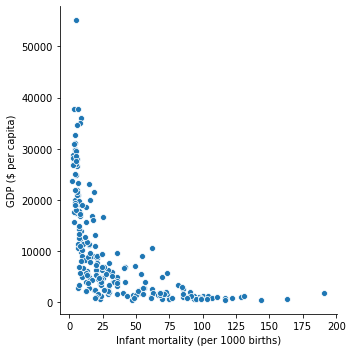

GDP ($ per capita)


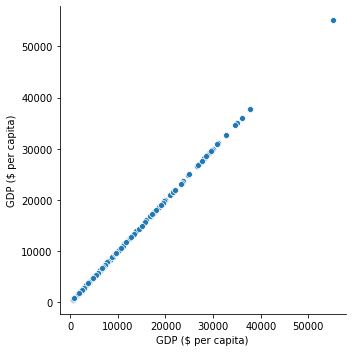

Literacy (%)


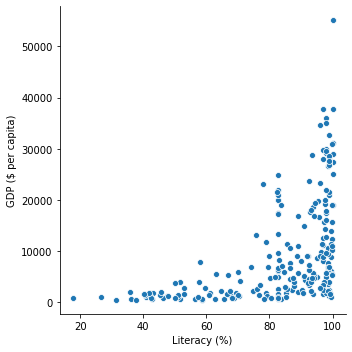

Phones (per 1000)


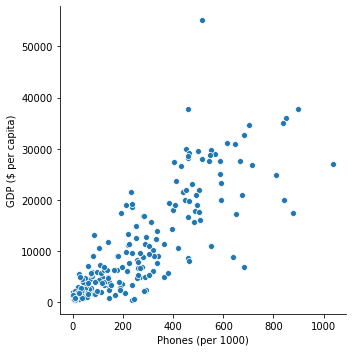

Arable (%)


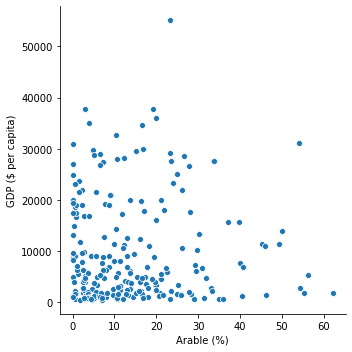

Crops (%)


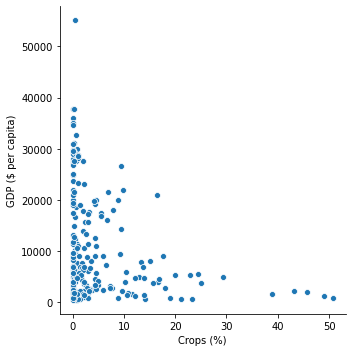

Other (%)


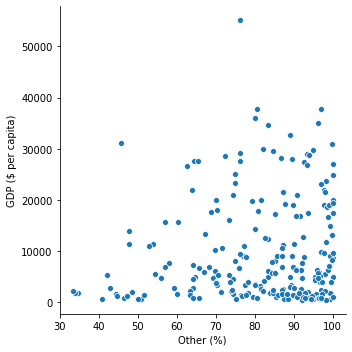

Birthrate


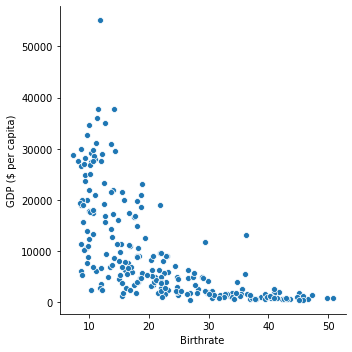

Deathrate


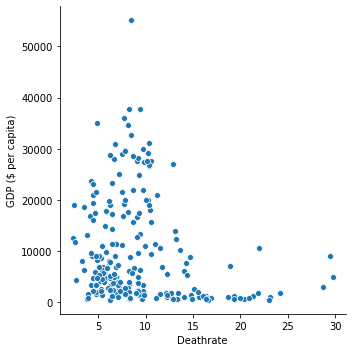

Agriculture


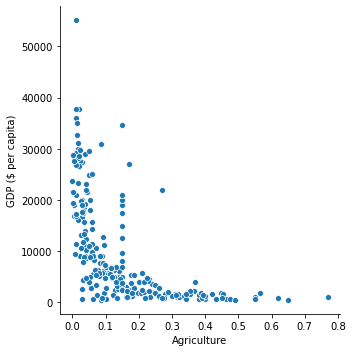

Industry


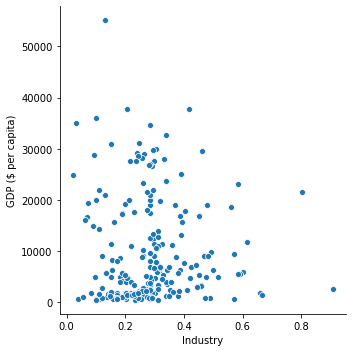

Service


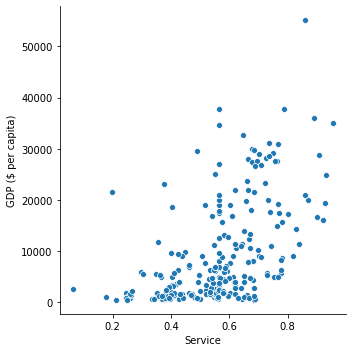

In [86]:
for i in columnsToBeAnalyzed:
    if(data[i].dtype.name != "category"):
        print(i)
        sns.relplot(x=i, y="GDP ($ per capita)", data=data)
    plt.show()

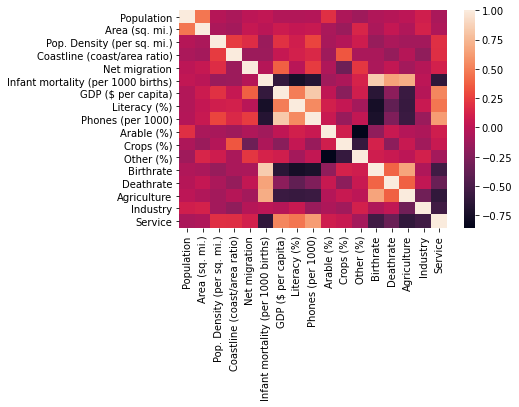

In [87]:
sns.heatmap(data.corr())

#### Following columns are identified to have direct relationship with GDP:
1. Countries with no migration shows higher GDP.
2. Logarithmic decline in GDP with increase in Infant mortality.
3. Logarithmic increase in GDP with increase in Literacy Rate.
4. Linear increase in GDP with Phones.
5. Logarithmic decline in GDP with increase in birthrate.
6. Agriculture effects GDP.
7. More the service more the GDP

## Dealing with outliers for Numerical Columns:

In [88]:
for i in columnsToBeAnalyzed:
    if(data[i].dtype.name != "category"):
        print(i)
        skew = data[i].skew()
        print("Skewness =", skew)
        if(skew>=-0.5 and skew<=0.5):
            print("Approximate Normal Distribution")
            data=data[data[i]<(data[i].mean() + 3 * data[i].std())]
        else:
            Q1= np.percentile(data[i],25)
            Q3= np.percentile(data[i],75)

            outlier_low=Q1 - 1.5 * (Q3 - Q1)
            outlier_high=Q3 + 1.5 * (Q3 - Q1)

            data=data[(data[i]>outlier_low) & (data[i]<outlier_high)]
    plt.show()

Population
Skewness = 9.200223032094938
Area (sq. mi.)
Skewness = 6.940194020143742
Pop. Density (per sq. mi.)
Skewness = 7.296897956620523
Coastline (coast/area ratio)
Skewness = 8.615791333718716
Net migration
Skewness = 1.0876495687185426
Infant mortality (per 1000 births)
Skewness = 0.7324218822718528
GDP ($ per capita)
Skewness = 1.5665436593889066
Literacy (%)
Skewness = -0.7259357837752693
Phones (per 1000)
Skewness = 0.9881740655051146
Arable (%)
Skewness = 1.056022452330132
Crops (%)
Skewness = 3.2295863544616346
Other (%)
Skewness = -0.8439847948709697
Birthrate
Skewness = 0.035954133698375766
Approximate Normal Distribution
Deathrate
Skewness = 1.5731087984753254
Agriculture
Skewness = 0.8318762264062906
Industry
Skewness = 1.8913880003564272
Service
Skewness = -0.1569050585157589
Approximate Normal Distribution


## One Hot Encoding For Categorical Data:

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 14 to 224
Data columns (total 20 columns):
Country                               72 non-null object
Region                                72 non-null category
Population                            72 non-null int64
Area (sq. mi.)                        72 non-null float64
Pop. Density (per sq. mi.)            72 non-null float64
Coastline (coast/area ratio)          72 non-null float64
Net migration                         72 non-null float64
Infant mortality (per 1000 births)    72 non-null float64
GDP ($ per capita)                    72 non-null float64
Literacy (%)                          72 non-null float64
Phones (per 1000)                     72 non-null float64
Arable (%)                            72 non-null float64
Crops (%)                             72 non-null float64
Other (%)                             72 non-null float64
Climate                               72 non-null category
Birthrate                 

In [92]:
data=pd.get_dummies(data=data, columns=['Region','Climate'], drop_first=True)

In [93]:
data

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),...,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE,Climate_1.5,Climate_2.0,Climate_2.5,Climate_3.0,Climate_4.0
14,"Bahamas, The",303770,13940.0,21.8,25.41,-2.200000,25.210000,16700.000000,95.600000,460.600000,...,0,0,0,0,0,0,1,0,0,0
18,Belarus,10293011,207600.0,49.6,0.00,2.540000,13.370000,6100.000000,99.600000,319.100000,...,0,0,0,0,0,0,0,0,0,1
20,Belize,287730,22966.0,12.5,1.68,0.000000,25.690000,4900.000000,94.100000,115.700000,...,0,0,0,0,0,0,1,0,0,0
21,Benin,7862944,112620.0,69.8,0.11,0.000000,85.000000,1100.000000,40.900000,9.700000,...,0,0,0,1,0,0,1,0,0,0
23,Bhutan,2279723,47000.0,48.5,0.00,0.000000,100.440000,1300.000000,42.200000,14.300000,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Uruguay,3431932,176220.0,19.5,0.37,-0.320000,11.950000,12800.000000,98.000000,291.400000,...,0,0,0,0,0,0,0,0,1,0
216,Uzbekistan,27307134,447400.0,61.0,0.00,-1.720000,71.100000,1700.000000,99.300000,62.900000,...,0,0,0,0,0,0,0,0,0,0
217,Vanuatu,208869,12200.0,17.1,20.72,0.000000,55.160000,2900.000000,53.000000,32.600000,...,0,0,1,0,0,0,1,0,0,0
223,Western Sahara,273008,266000.0,1.0,0.42,0.038125,35.506964,9689.823009,82.838278,236.061435,...,1,0,0,0,0,0,0,0,0,0


# Conclusion:
1. Countries with no migration shows higher GDP.
2. Logarithmic decline in GDP with increase in Infant mortality.
3. Logarithmic increase in GDP with increase in Literacy Rate.
4. Linear increase in GDP with Phones.
5. Logarithmic decline in GDP with increase in birthrate.
6. Agriculture effects GDP.
7. More the service more the GDP